# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [78]:
# %pip install --upgrade plotly

### Import Statements

In [79]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [80]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [81]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [82]:
df_data.shape,"        ", df_data.columns

((962, 16),
 '        ',
 Index(['year', 'category', 'prize', 'motivation', 'prize_share',
        'laureate_type', 'full_name', 'birth_date', 'birth_city',
        'birth_country', 'birth_country_current', 'sex', 'organization_name',
        'organization_city', 'organization_country', 'ISO'],
       dtype='object'))

In [83]:
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA


In [84]:
# df_data["year"] = pd.to_datetime(df_data["year"], infer_datetime_format=True)

In [85]:
df_data.sort_values("year", ascending=True).head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD


In [86]:
df_data.sort_values("year", ascending=False).head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [87]:
df_data.duplicated().sum(),"     ","     ", df_data.isna().sum()

(0,
 '     ',
 '     ',
 year                       0
 category                   0
 prize                      0
 motivation                88
 prize_share                0
 laureate_type              0
 full_name                  0
 birth_date                28
 birth_city                31
 birth_country             28
 birth_country_current     28
 sex                       28
 organization_name        255
 organization_city        255
 organization_country     254
 ISO                       28
 dtype: int64)

### Check for NaN Values

In [88]:
df_data[df_data["motivation"].isna() == True].head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [89]:
df_data["birth_date"] = pd.to_datetime(df_data["birth_date"], infer_datetime_format=True)
df_data.dtypes

C:\Users\Joerg\AppData\Local\Temp\ipykernel_18540\3119773437.py:1: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



year                              int64
category                         object
prize                            object
motivation                       object
prize_share                      object
laureate_type                    object
full_name                        object
birth_date               datetime64[ns]
birth_city                       object
birth_country                    object
birth_country_current            object
sex                              object
organization_name                object
organization_city                object
organization_country             object
ISO                              object
dtype: object

#### Add a Column with the Prize Share as a Percentage

In [90]:
price_guys = df_data["full_name"].value_counts()
price_guys

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Frederick Sanger                                                                     2
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
                                                                                    ..
Melvin Calvin                                                                        1
Ivo Andric                                                                           1
Georg von Békésy                                                                     1
Dag Hjalmar Agne Carl Hammarskjöld                                                   1
Roger Penrose                                                                        1
Name: count, Length: 955, dtype: 

In [91]:
# Price share in percentage, so the partial proportion per price
split_prize_share_col = df_data["prize_share"].str.split("/")
# split_prize_share_col
new_col_split = [float(entry[0]) / float(entry[1]) for entry in split_prize_share_col]
new_col_split[:4]

[1.0, 1.0, 1.0, 0.5]

In [92]:
df_data["share_pct"] = new_col_split

In [93]:
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00


In [94]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [95]:
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00


In [96]:
total_rows = df_data.shape[0]
print(total_rows)
df_data["sex"].value_counts()

962


sex
Male      876
Female     58
Name: count, dtype: int64

In [97]:
import plotly.express as px
import numpy as np

px.pie(names=np.array(df_data["sex"].value_counts().keys()),
# labels=np.array(df_data["sex"].value_counts().keys()),
       values=df_data["sex"].value_counts().values,
       hole=0.5
       )



# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [98]:
df_data[df_data["sex"]=="Female"].sort_values("year",ascending=True).head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


In [99]:
print(df_data[df_data["sex"]=="Female"].sort_values("year",ascending=True)["motivation"].head(3))

18    "in recognition of the extraordinary services ...
29                                                  NaN
51    "in appreciation of the lofty idealism, vivid ...
Name: motivation, dtype: object


In [100]:
# df_data.sort_values("year", ascending=False).head(3)
# 

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [101]:
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00


In [102]:
df_data["full_name"].value_counts().head(8)

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Frederick Sanger                                                                     2
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Marie Curie, née Sklodowska                                                          2
F. Sherwood Rowland                                                                  1
Reinhard Selten                                                                      1
Name: count, dtype: int64

In [103]:
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
print(f'There are {multiple_winners.full_name.nunique()}' \
      ' winners who were awarded the prize more than once.')
      
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

There are 6 winners who were awarded the prize more than once.


,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [104]:
df_data["category"].value_counts()

category
Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: count, dtype: int64

In [105]:
px.bar(
    x=df_data["category"].value_counts().index,
    y =df_data["category"].value_counts().values,
    labels={"y":"Category", "x":"Total"})

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [106]:
df_data[df_data["category"] == "Economics"].sort_values("year", ascending=True).head(3)
# Jan Tinbergen and Ragnar Frisch

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [107]:
df_data[["category","sex"]].value_counts()

category    sex   
Physics     Male      212
Medicine    Male      210
Chemistry   Male      179
Literature  Male      101
Peace       Male       90
Economics   Male       84
Peace       Female     17
Literature  Female     16
Medicine    Female     12
Chemistry   Female      7
Physics     Female      4
Economics   Female      2
Name: count, dtype: int64

In [108]:
# df_data[["category","sex"]].value_counts().index

In [109]:
df_data[["category","sex"]].value_counts().index.get_level_values("category")

Index(['Physics', 'Medicine', 'Chemistry', 'Literature', 'Peace', 'Economics',
       'Peace', 'Literature', 'Medicine', 'Chemistry', 'Physics', 'Economics'],
      dtype='object', name='category')

In [110]:
px.bar(
    y=df_data[["category","sex"]].value_counts().values, 
    x=df_data[["category","sex"]].value_counts().index.get_level_values("category"),
    color=df_data[["category","sex"]].value_counts().index.get_level_values("sex"),
    labels={"x":"Nobel prices per category", "y":"Total"}
)

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [111]:
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00


In [112]:
df_data["year"].value_counts()

year
2001    15
2019    14
1996    13
2018    13
2000    13
        ..
1915     4
1924     3
1914     3
1918     2
1916     1
Name: count, Length: 117, dtype: int64

In [113]:
# df['Mycol'] = pd.to_datetime(df['Mycol'], format='%d%b%Y:%H:%M:%S.%f')
df_data["year"] = pd.to_datetime(df_data["year"], format='%Y')

In [114]:
roll_dt_5_year = pd.DatetimeIndex(pd.to_datetime(df_data["year"],infer_datetime_format=True).sort_values(ascending=True))
print(roll_dt_5_year)
roll_dt_5_year_y = roll_dt_5_year.year
roll_dt_5_year_y = np.around(roll_dt_5_year_y/5, decimals=0)*5

print(f"\n\n{roll_dt_5_year_y.unique()}")


C:\Users\Joerg\AppData\Local\Temp\ipykernel_18540\545398983.py:1: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



DatetimeIndex(['1901-01-01', '1901-01-01', '1901-01-01', '1901-01-01',
               '1901-01-01', '1901-01-01', '1902-01-01', '1902-01-01',
               '1902-01-01', '1902-01-01',
               ...
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='year', length=962, freq=None)


Index([1900.0, 1905.0, 1910.0, 1915.0, 1920.0, 1925.0, 1930.0, 1935.0, 1940.0,
       1945.0, 1950.0, 1955.0, 1960.0, 1965.0, 1970.0, 1975.0, 1980.0, 1985.0,
       1990.0, 1995.0, 2000.0, 2005.0, 2010.0, 2015.0, 2020.0],
      dtype='float64', name='year')


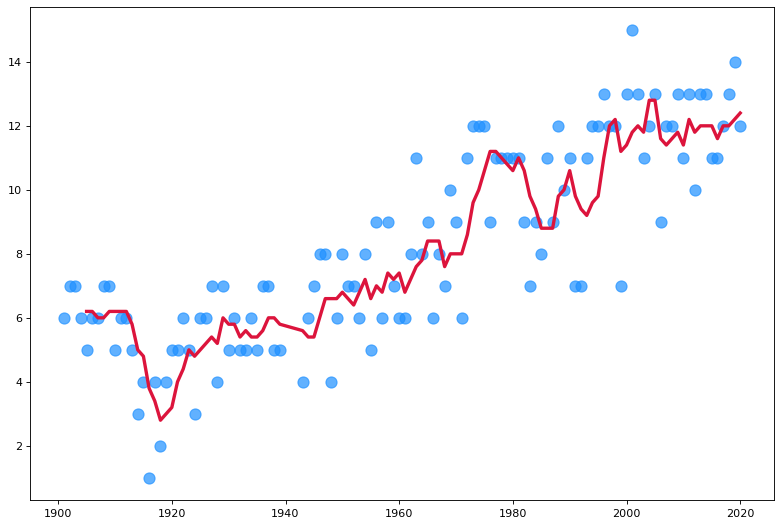

In [115]:
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)

prize_per_year = df_data.groupby(by='year').count().prize 


# Just use rolling 
moving_average = prize_per_year.rolling(window=5).mean()

plt.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
plt.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [116]:
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00


In [117]:
share_per_year = df_data.groupby(by='year').agg({"share_pct":"mean"})
share_per_year.head(2)

,share_pct
year,
1901-01-01,0.83
1902-01-01,0.71


In [118]:
share_rolling_5 = share_per_year.rolling(5).mean()
share_rolling_5.head(5)

,share_pct
year,
1901-01-01,NaN
1902-01-01,NaN
1903-01-01,NaN
1904-01-01,NaN
1905-01-01,0.82


In [119]:
prize_per_year

year
1901-01-01     6
1902-01-01     7
1903-01-01     7
1904-01-01     6
1905-01-01     5
              ..
2016-01-01    11
2017-01-01    12
2018-01-01    13
2019-01-01    14
2020-01-01    12
Name: prize, Length: 117, dtype: int64

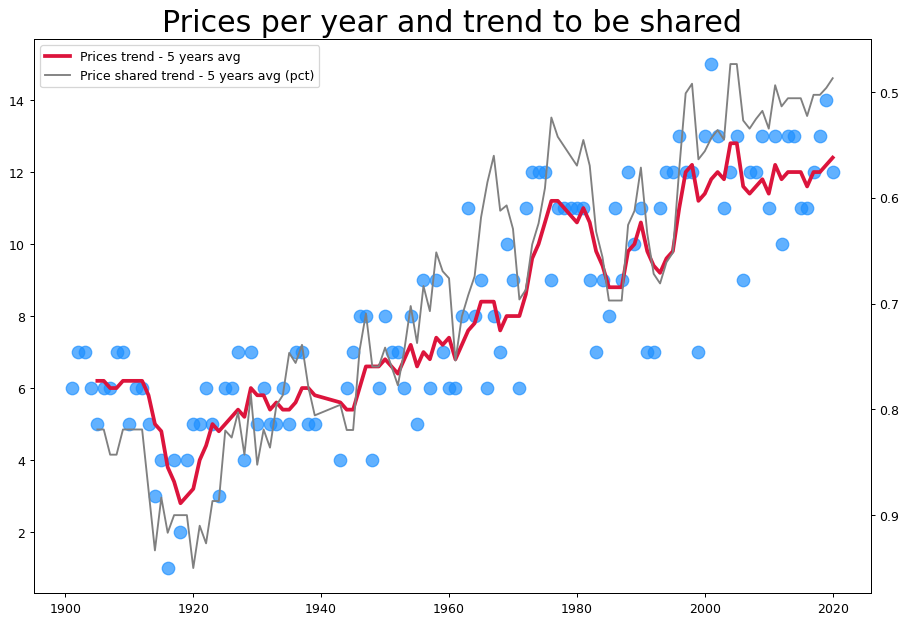

In [120]:
fig, ax = plt.subplots(figsize=(12,8), dpi=90)

ax.set_title("Prices per year and trend to be shared", fontdict={"fontsize":24})

ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis

ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,
        label="Prices trend - 5 years avg")

# Invert y-axis of share, to make it clearer that thorugh the years more prices been shared
ax2.invert_yaxis()
ax2.plot(share_per_year.index,
        share_rolling_5.values,
        c="grey",
        label="Price shared trend - 5 years avg (pct)")

# Grab labels from line axis
# Get the lines and labels from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

# Combine them
all_lines = lines_1 + lines_2
all_labels = labels_1 + labels_2

# Now use them in plt.legend()
plt.legend(all_lines, all_labels)


plt.show()



# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [121]:
top20_countries = df_data.groupby(by=["birth_country_current"]).agg({"prize":"count"}).reset_index()
top20_countries.sort_values("prize", ascending=True).head(5)

,birth_country_current,prize
78,Zimbabwe,1
77,Yemen,1
32,Iceland,1
41,Kenya,1
29,Guadeloupe Island,1


In [122]:
import plotly.express as px

fig = px.bar(
    data_frame=top20_countries.sort_values("prize", ascending=True),
    x="prize",
    y="birth_country_current",
    color="prize",
    # Styling
    color_continuous_scale='Viridis',
    title="Nobel prices won by birth current countries",
    labels={
        "prize":"Prizes in total per organization country",
        "birth_country_current": "Birth current Country"
    },
    width=1200,
    height=1200)

fig.update_layout(
    # font_family="Courier New",
    # font_color="blue",
    title_font_family="Arial",
    title_font_size=28,
    # coloraxis_showscale=False
    # title_font_color="red",
    # legend_title_font_color="green"
)
# fig.update_xaxes(range=[0, 0.4], row=1, col=1)


fig.show()

In [123]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'], 
                               as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)                    

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
32,Iceland,ISL,1
47,Madagascar,MDG,1
34,Indonesia,IDN,1
36,Iraq,IRQ,1


In [124]:
from urllib.request import urlopen
import plotly.express as px  # Add this import statement

import json



fig = px.choropleth(top20_countries,
                    # df_countries,  
                    # locations='ISO', 
                    # color='prize',
                    # color_continuous_scale="matter",
                    # scope="world",
                    locations='birth_country_current',
                    locationmode='country names',
                    color='prize',
                    hover_name='birth_country_current',
                    color_continuous_scale='matter'
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [125]:
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00


In [126]:
countries_cat = df_data.groupby([ "birth_country_current","category"], as_index=False).agg({"prize":"count"})
countries_cat.tail(10)

,birth_country_current,category,prize
201,United States of America,Chemistry,55
202,United States of America,Economics,49
203,United States of America,Literature,10
204,United States of America,Medicine,78
205,United States of America,Peace,19
206,United States of America,Physics,70
207,Venezuela,Medicine,1
208,Vietnam,Peace,1
209,Yemen,Peace,1
210,Zimbabwe,Peace,1


In [127]:
sum_merge = countries_cat.groupby("birth_country_current", as_index=False).sum()
sum_merge.rename(columns={"prize":"prize_total"}, inplace=True)
sum_merge.tail(10)

,birth_country_current,category,prize_total
69,Taiwan,Chemistry,1
70,Trinidad,Literature,1
71,Turkey,ChemistryLiterature,3
72,Ukraine,ChemistryLiteratureMedicine,5
73,United Kingdom,ChemistryEconomicsLiteratureMedicinePeacePhysics,105
74,United States of America,ChemistryEconomicsLiteratureMedicinePeacePhysics,281
75,Venezuela,Medicine,1
76,Vietnam,Peace,1
77,Yemen,Peace,1
78,Zimbabwe,Peace,1


In [128]:
merge_country_price = countries_cat.merge(sum_merge, on="birth_country_current").sort_values("prize_total")
merge_country_price.rename({"category_x":"category"},inplace=True, axis=1)
merge_country_price.drop("category_y", inplace=True, axis=1)
merge_country_price

,birth_country_current,category,prize,prize_total
210,Zimbabwe,Peace,1,1
43,Cyprus,Economics,1,1
25,Brazil,Medicine,1,1
26,Bulgaria,Literature,1,1
115,Kenya,Peace,1,1
...,...,...,...,...
203,United States of America,Literature,10,281
204,United States of America,Medicine,78,281
205,United States of America,Peace,19,281
206,United States of America,Physics,70,281


In [129]:
import plotly.express as px

fig = px.bar(
    merge_country_price,
    x="prize",
    y="birth_country_current",
    color="category",
    orientation='h',
    title='Top 20 Countries by Number of Prizes and Category',
    width=1200,
    height=2000
)

fig.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country',
                            yaxis={'categoryorder':'total ascending'})

fig.show()

# In which category are Germany and Japan the weakest compared to the United States? -  Economics
# In which category does Germany have more prizes than the UK? - Physics
# In which categories does France have more prizes than Germany? - Economics
# Which category makes up most of Australia's Nobel prizes? - Medicine
# Which category makes up half of the prizes in the Netherlands? - Medicine
# Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine? - No, but quite. Phyiscs, yes. Medicine, yes.

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [130]:
# Total number prices and time
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00


In [131]:
df_countries_agg_cumsum = df_data.groupby(["year","birth_country_current"]).agg({"year":"count"}).groupby("birth_country_current").cumsum()
df_countries_agg_cumsum.rename({"year":"year_cumsum"},axis=1, inplace=True)
df_countries_agg_cumsum.reset_index(inplace=True)
df_countries_agg_cumsum

,year,birth_country_current,year_cumsum
0,1901-01-01,France,2
1,1901-01-01,Germany,1
2,1901-01-01,Netherlands,1
3,1901-01-01,Poland,1
4,1901-01-01,Switzerland,1
...,...,...,...
622,2019-01-01,United States of America,274
623,2020-01-01,France,57
624,2020-01-01,Germany,84
625,2020-01-01,United Kingdom,105


In [132]:
df_countries_agg_cumsum.columns

Index(['year', 'birth_country_current', 'year_cumsum'], dtype='object')

In [133]:
import plotly.express as px

fig = px.line(
    df_countries_agg_cumsum,
    x="year",
    y="year_cumsum",
    color="birth_country_current",
    title="Yearly Cumulative Sum by Country",
    height=900,
    width=1400
)

fig.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [134]:
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00


In [135]:
top_organizations = df_data.groupby("organization_name").agg({"prize": "count"}).sort_values("prize", ascending=False)
top_organizations.reset_index(inplace=True)
top_organizations.head(5)

,organization_name,prize
0,University of California,40
1,Harvard University,29
2,Stanford University,23
3,Massachusetts Institute of Technology (MIT),21
4,University of Chicago,20


In [136]:
import plotly.express as px

fig = px.bar(
    top_organizations[:20],
    x="prize",
    y="organization_name",
    color="organization_name",
    color_continuous_scale=px.colors.sequential.haline,
    width=1400,
    height=1000
)

fig.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Organization',
                            yaxis={'categoryorder':'total ascending'},
                      coloraxis_showscale=False
                            )

fig.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [137]:
top20_org_cities = df_data.organization_city.value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)
# top20_org_cities

In [138]:
city_bar2 = px.bar(x = top20_org_cities.values,
                  y = top20_org_cities.index,
                  orientation='h',
                  color=top20_org_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Which Cities Do the Most Research?')
 
city_bar2.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City',
                       coloraxis_showscale=False)
city_bar2.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [139]:
top20_cities = df_data.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)
city_bar = px.bar(x=top20_cities.values,
                  y=top20_cities.index,
                  orientation='h',
                  color=top20_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Where were the Nobel Laureates Born?')
 
city_bar.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City of Birth',
                       coloraxis_showscale=False)
city_bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [140]:
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00


In [141]:
top_cities_origanizations = df_data.groupby(["organization_country","organization_city","organization_name"]).agg({"prize":"count"})
top_cities_origanizations.reset_index(inplace=True)
top_cities_origanizations.sort_values("prize", ascending=False)

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [142]:
import plotly.express as px

fig = px.sunburst(
    top_cities_origanizations,
    path=["organization_country", "organization_city", "organization_name"], values="prize",
    width=1000,
    height=1000
)



# fig.write_image("nobel_prices_img.png") 
fig.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [143]:
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00


In [144]:
df_data["winning_age"] = (df_data["year"] - df_data["birth_date"]) / 365.25
df_data["winning_age"] = df_data["winning_age"].dt.days
df_data.head(2) 

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,48.00
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,61.00


### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [145]:
df_data[["full_name","winning_age","category","motivation","year"]].sort_values("winning_age",ascending=False).dropna()

,full_name,winning_age,category,motivation,year
937,John Goodenough,96.00,Chemistry,“for the development of lithium-ion batteries”,2019-01-01
933,Arthur Ashkin,95.00,Physics,“for the optical tweezers and their applicatio...,2018-01-01
794,Leonid Hurwicz,89.00,Economics,"""for having laid the foundations of mechanism ...",2007-01-01
961,Roger Penrose,88.00,Physics,“for the discovery that black hole formation i...,2020-01-01
856,Lloyd S. Shapley,88.00,Economics,"""for the theory of stable allocations and the ...",2012-01-01
...,...,...,...,...,...
166,Werner Karl Heisenberg,30.00,Physics,"""for the creation of quantum mechanics, the ap...",1932-01-01
171,Paul Adrien Maurice Dirac,30.00,Physics,"""for the discovery of new productive forms of ...",1933-01-01
85,William Lawrence Bragg,24.00,Physics,"""for their services in the analysis of crystal...",1915-01-01
932,Nadia Murad,24.00,Peace,“for their efforts to end the use of sexual vi...,2018-01-01


In [146]:
avg_age = df_data[["full_name","winning_age","category","motivation","year"]].sort_values("winning_age",ascending=False).describe()

# avg age is 58.95
# 75% were younger then 68
avg_age

,winning_age,year
count,934.00,962
mean,58.95,1971-10-26 04:17:27.817047816
min,16.00,1901-01-01 00:00:00
25%,50.00,1948-01-01 00:00:00
50%,59.00,1977-01-01 00:00:00
75%,68.00,2001-01-01 00:00:00
max,96.00,2020-01-01 00:00:00
std,12.62,NaN


c:\Users\Joerg\anaconda3\envs\dl_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



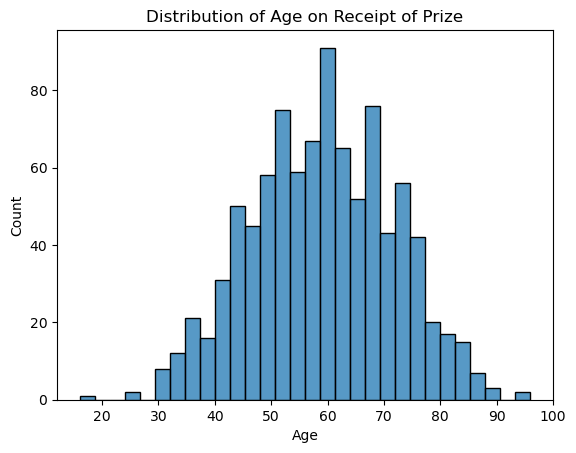

In [147]:
import seaborn as sns

sns.histplot(df_data["winning_age"],
             bins=30)


plt.xlabel("Age")
plt.title("Distribution of Age on Receipt of Prize")
plt.show()

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [148]:
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,48.00
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,61.00


In [149]:
statistics_per_year = df_data.groupby("year", as_index=False)[["winning_age"]].describe()
# statistics_per_year.reset_index(inplace=True)
statistics_per_year

year winning_age                                          
                     count  mean   std   min   25%   50%   75%   max
0   1901-01-01        6.00 60.00 12.92 46.00 49.75 58.00 69.25 78.00
1   1902-01-01        7.00 55.29 16.26 36.00 46.00 49.00 63.00 84.00
2   1903-01-01        7.00 51.00 15.03 35.00 42.50 43.00 60.00 74.00
3   1904-01-01        5.00 62.00  9.85 51.00 54.00 61.00 71.00 73.00
4   1905-01-01        5.00 58.20  9.93 42.00 58.00 61.00 61.00 69.00
..         ...         ...   ...   ...   ...   ...   ...   ...   ...
112 2016-01-01       11.00 69.64  5.32 64.00 65.00 70.00 72.50 81.00
113 2017-01-01       11.00 73.09  5.99 62.00 71.00 72.00 76.00 84.00
114 2018-01-01       13.00 65.54 16.29 24.00 61.00 66.00 75.00 95.00
115 2019-01-01       14.00 65.43 15.10 42.00 54.75 63.00 76.00 96.00
116 2020-01-01       11.00 69.55 12.48 51.00 61.00 70.00 79.00 88.00

[117 rows x 9 columns]

In [150]:
df_data.dtypes

year                     datetime64[ns]
category                         object
prize                            object
motivation                       object
prize_share                      object
laureate_type                    object
full_name                        object
birth_date               datetime64[ns]
birth_city                       object
birth_country                    object
birth_country_current            object
sex                              object
organization_name                object
organization_city                object
organization_country             object
ISO                              object
share_pct                       float64
winning_age                     float64
dtype: object

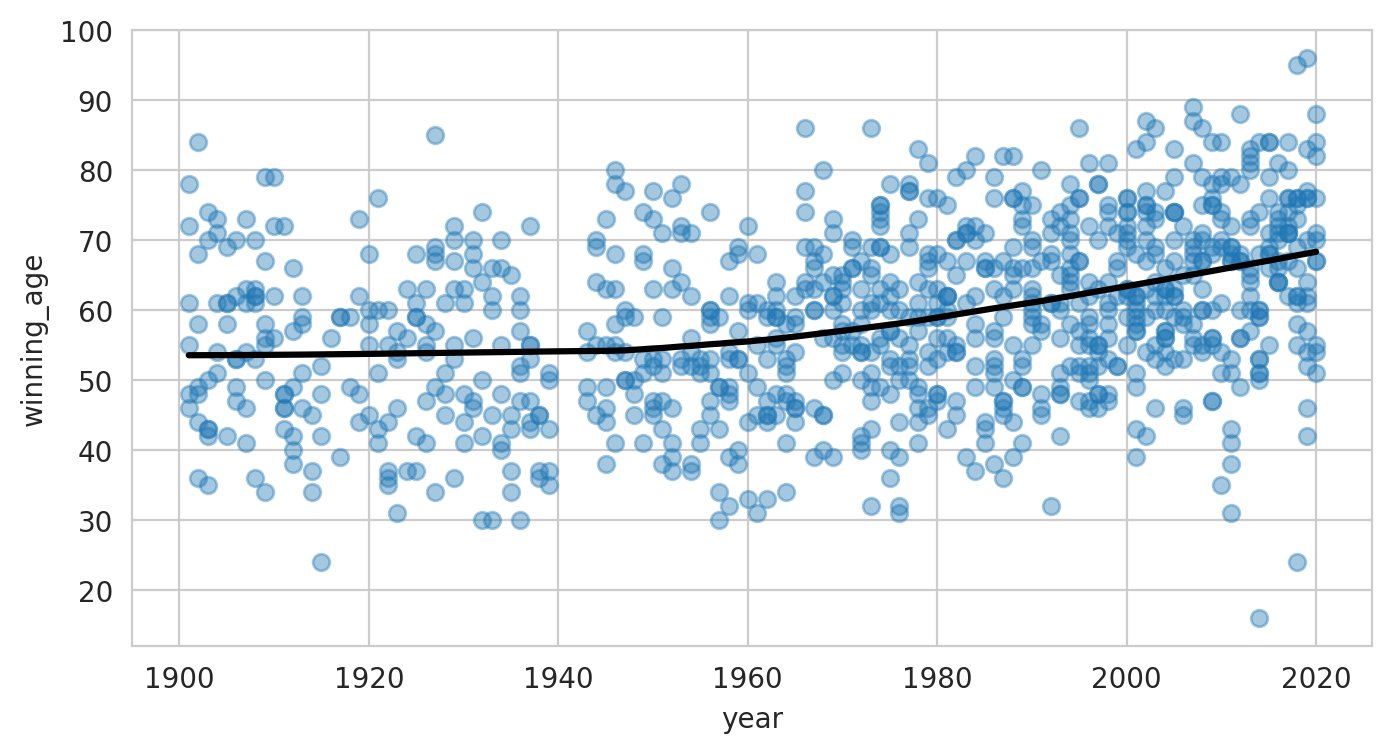

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


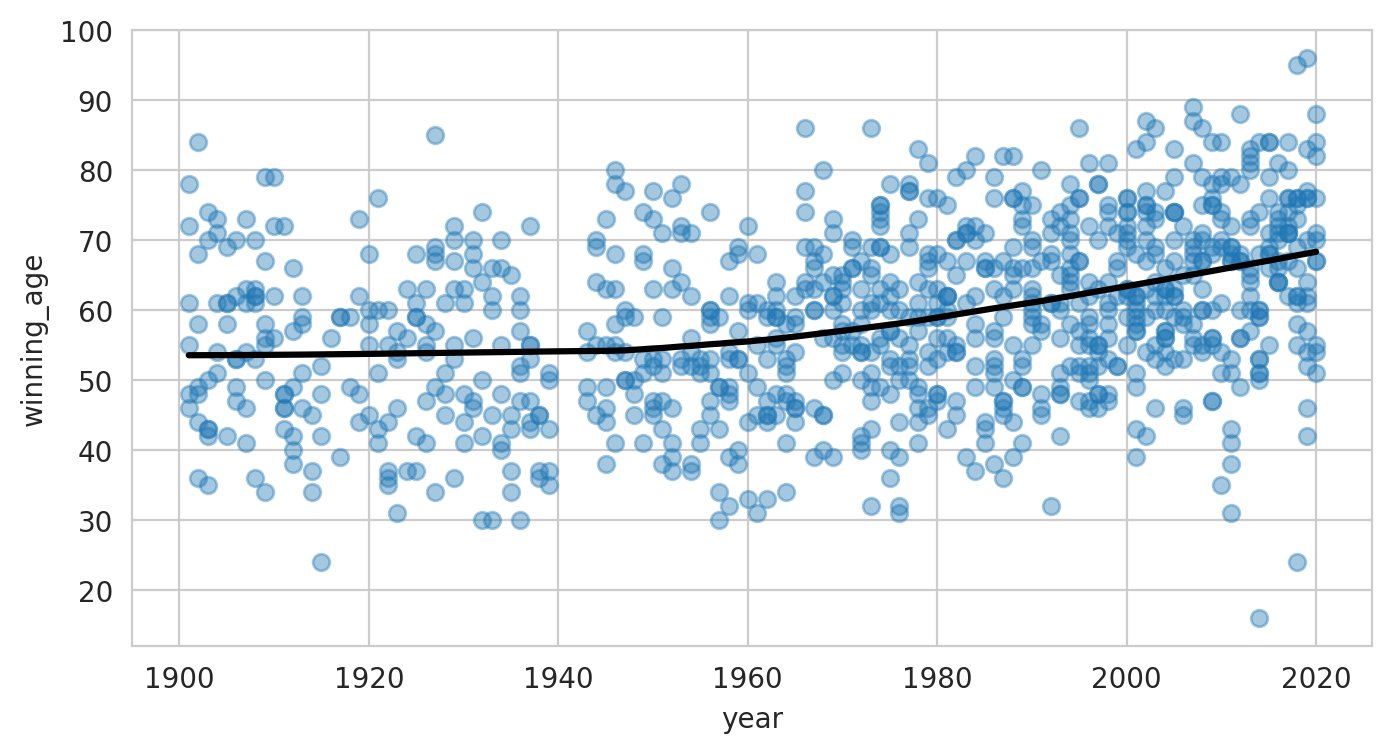

In [154]:
try:df_data["year"] = df_data["year"].dt.year
except: pass
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

In [156]:
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,48.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,61.00


### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

In [159]:
df_data.head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,48.00


<Axes: xlabel='category', ylabel='winning_age'>

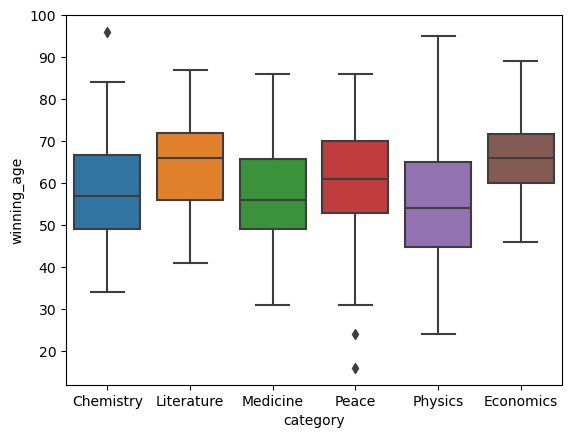

In [166]:
import seaborn as sns
# Age/Category
sns.boxplot(
    df_data,
    y="winning_age",
    x="category"
)
# Median winner oldest: Economics
# Median winner youngest: Physics

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


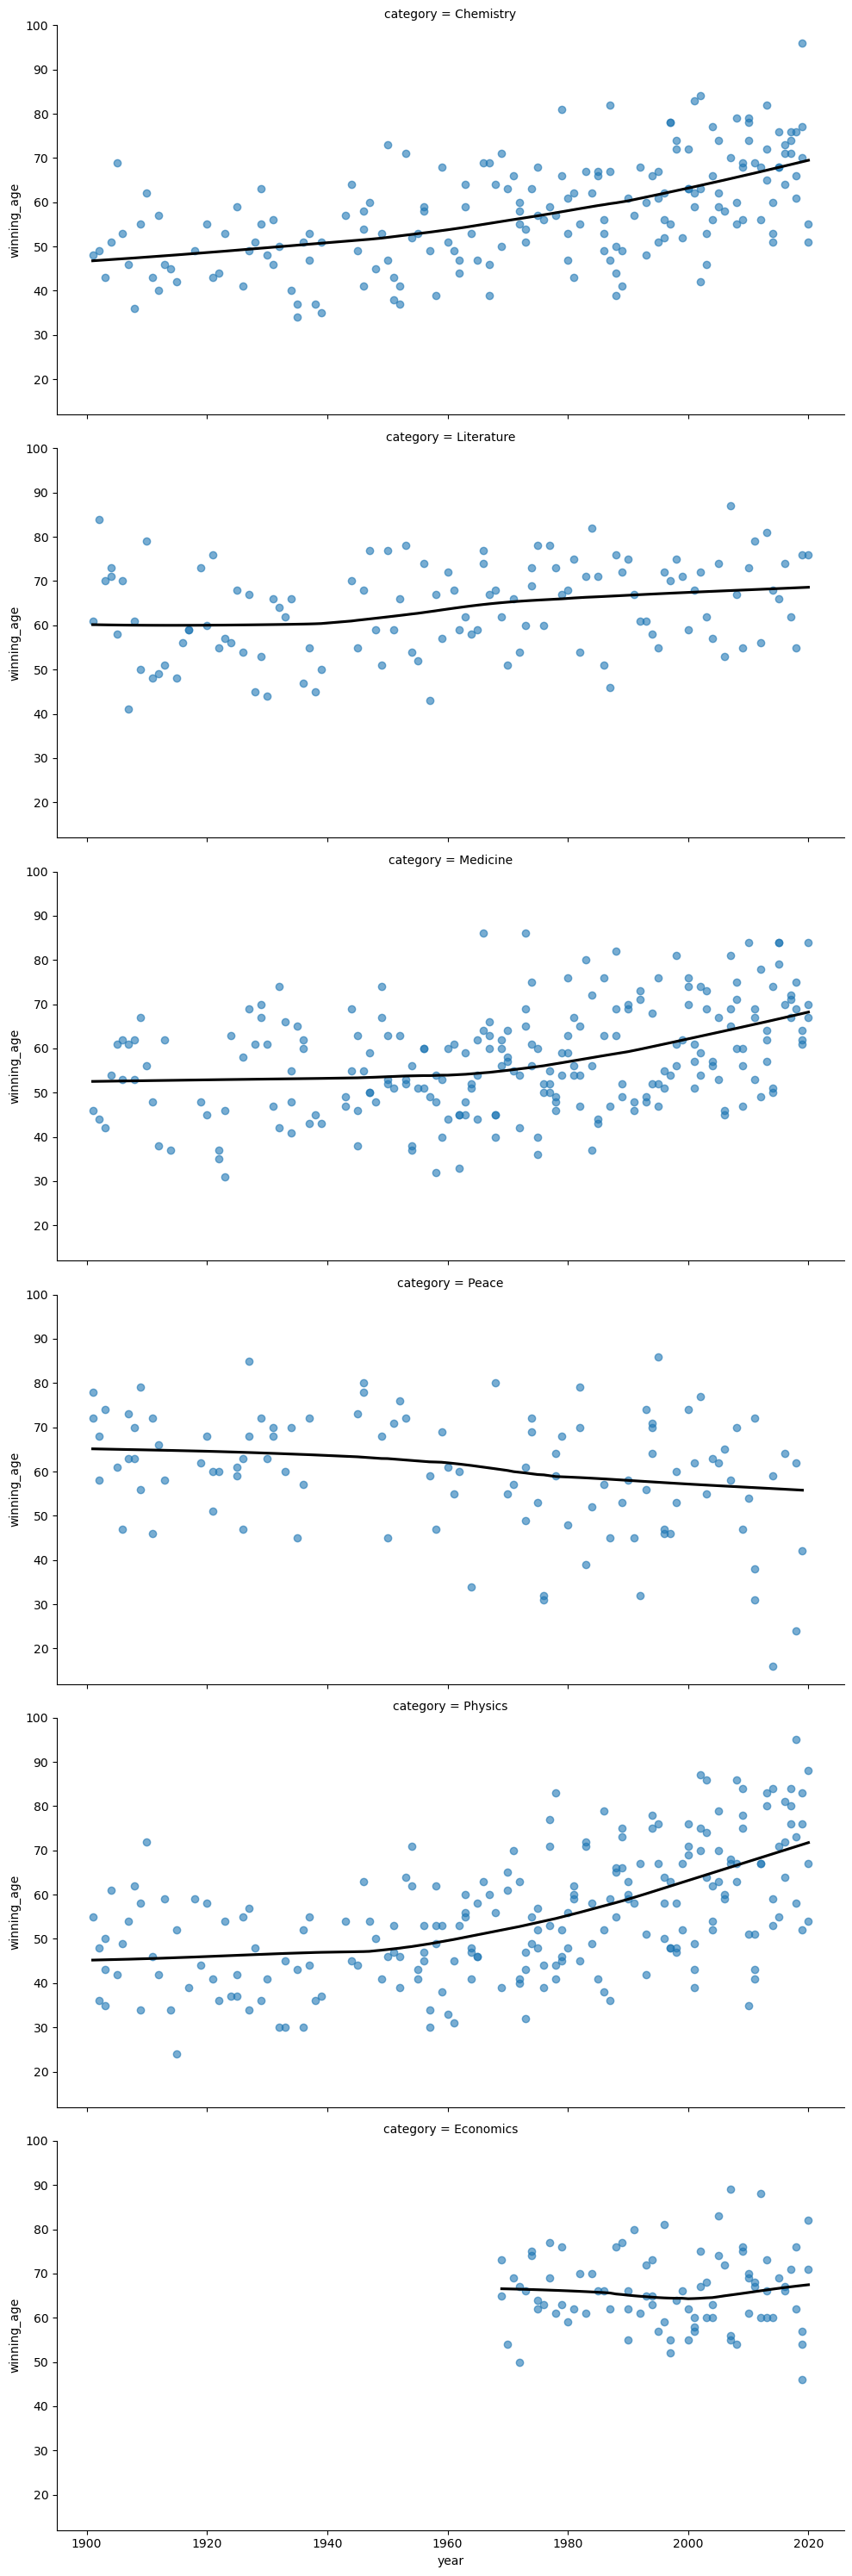

In [177]:

sns.lmplot(
    df_data,
    x="year",
    y="winning_age",
    row="category",
    lowess=True,
    aspect=2,
    scatter_kws = {'alpha': 0.6},
    line_kws = {'color': 'black'})

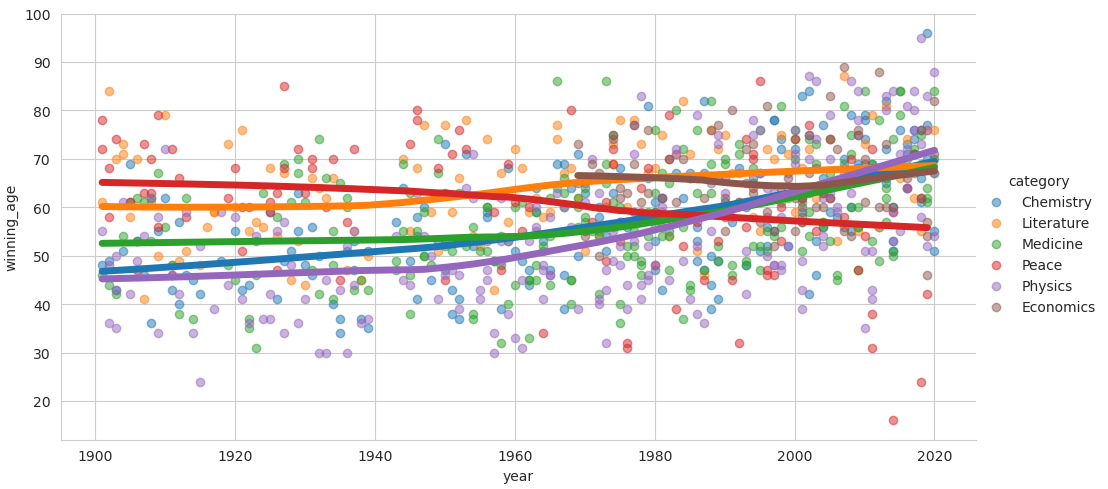

In [178]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
 
 
plt.show()